In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Parámetros del modelo
a, b = 2, 0.75  # Inflación
c, d = 1, 0.5   # Tasa de interés
sigma_inflation = 1      # Desviación estándar de ruido en inflación
sigma_interest = 0.5     # Desviación estándar de ruido en interés

In [3]:
# Número de períodos
n_periods = 50

In [4]:
# Inicializar series
inflation = np.zeros(n_periods)
interest_rate = np.zeros(n_periods)

In [5]:
# Condiciones iniciales
inflation[0] = 3  # Inflación inicial
interest_rate[0] = c + d * inflation[0] + np.random.normal(0, sigma_interest)

In [6]:
# Simulación
np.random.seed(42)  # Semilla para reproducibilidad
for t in range(1, n_periods):
    # Ruido para inflación
    epsilon_t = np.random.normal(0, sigma_inflation)
    # Calcula la inflación según el modelo
    inflation[t] = a + b * inflation[t-1] + epsilon_t

    # Ruido para tasa de interés
    eta_t = np.random.normal(0, sigma_interest)
    # Calcula la tasa de interés según el modelo
    interest_rate[t] = c + d * inflation[t] + eta_t

In [7]:
# Crear DataFrame con los resultados
data = pd.DataFrame({
    "Periodo": np.arange(n_periods),
    "Inflacion (%)": inflation,
    "Tasa de Interes (%)": interest_rate
})

In [8]:
# Mostrar los primeros datos
data.head(10)

,Periodo,Inflacion (%),Tasa de Interes (%)
0,0,3.000000,2.854482
1,1,4.746714,3.304225
2,2,6.207724,4.865377
3,3,6.421640,4.093751
4,4,8.395443,5.581439
5,5,7.827108,5.184834
6,6,7.406913,4.470592
7,7,7.797147,3.941933
8,8,6.122942,3.780327
9,9,5.579376,3.946812


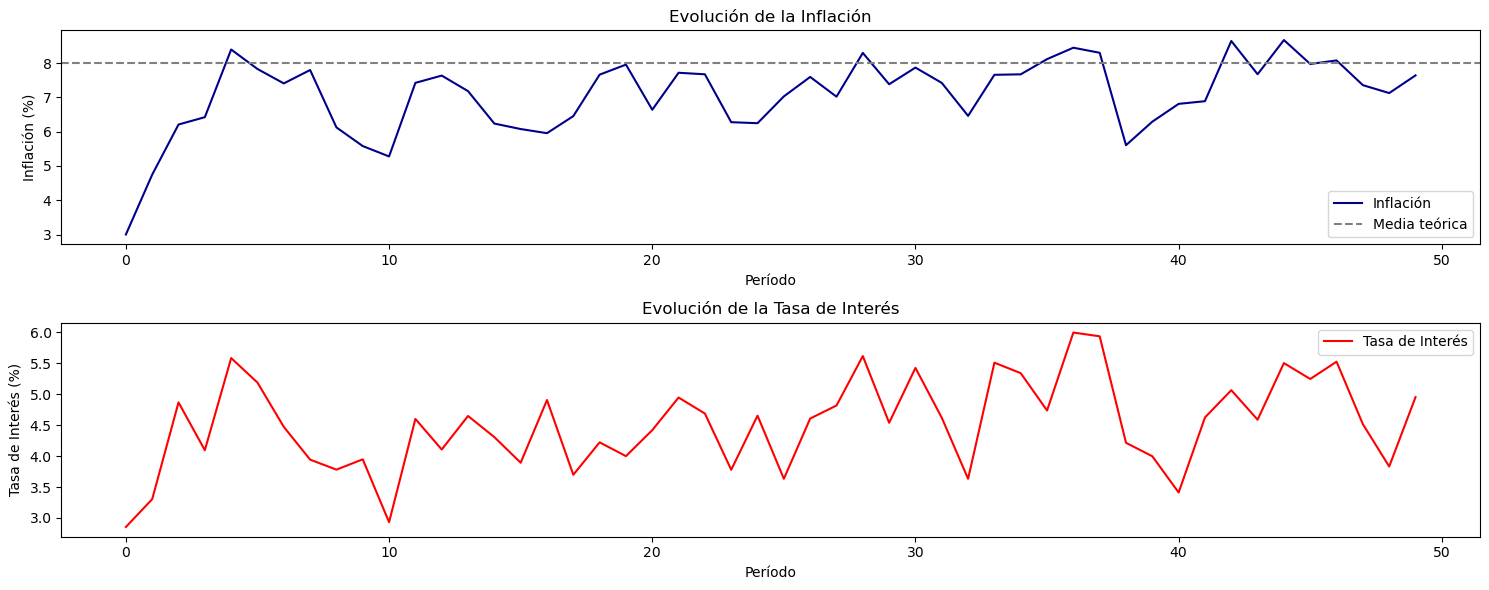

In [9]:
# Graficar las series
plt.figure(figsize=(15, 6))

# Inflación
plt.subplot(2, 1, 1)
plt.plot(data["Periodo"], data["Inflacion (%)"], label="Inflación", color="darkblue")
plt.title("Evolución de la Inflación")
plt.xlabel("Período")
plt.ylabel("Inflación (%)")
plt.axhline(a / (1 - b), linestyle="--", color="gray", label="Media teórica")
plt.legend()

# Tasa de interés
plt.subplot(2, 1, 2)
plt.plot(data["Periodo"], data["Tasa de Interes (%)"], label="Tasa de Interés", color="red")
plt.title("Evolución de la Tasa de Interés")
plt.xlabel("Período")
plt.ylabel("Tasa de Interés (%)")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Calcular promedios teóricos
mu_inflacion = a / (1 - b)
mu_interes = c + d * mu_inflacion
print(f"Media teórica de inflación: {mu_inflacion:.2f}%")
print(f"Media teórica de tasa de interés: {mu_interes:.2f}%")

Media teórica de inflación: 8.00%
Media teórica de tasa de interés: 5.00%
